In [2]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pdc
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
from scipy.optimize import curve_fit

In [4]:
ttdm2wt = np.load('mode2_allpars_wtpmlkl_ttds.npy')
ttdm2a20kd = np.load('mode2_allpars_a20kd_ttds.npy')
ttdm2a20oe = np.load('mode2_allpars_a20oe_ttds.npy')
ttdm2cyldkd = np.load('mode2_allpars_cyldkd_ttds.npy')
ttdm2cyldoe = np.load('mode2_allpars_cyldoe_ttds.npy')
ttdm2lubkd = np.load('mode2_allpars_lubackd_ttds.npy')
ttdm2luboe2 = np.load('mode2_allpars_lubacoe_ttds.npy')

In [5]:
ttdm2wt2 = [ttdm2wt / 60 for ttdm2wt in ttdm2wt]
ttdm2a20kd2 = [ttdm2a20kd / 60 for ttdm2a20kd in ttdm2a20kd]
ttdm2a20oe2 = [ttdm2a20oe / 60 for ttdm2a20oe in ttdm2a20oe]
ttdm2cyldkd2 = [ttdm2cyldkd / 60 for ttdm2cyldkd in ttdm2cyldkd]
ttdm2cyldoe2 = [ttdm2cyldoe / 60 for ttdm2cyldoe in ttdm2cyldoe]
ttdm2lubkd2 = [ttdm2lubkd / 60 for ttdm2lubkd in ttdm2lubkd]
ttdm2luboe22 = [ttdm2luboe2/60 for ttdm2luboe2 in ttdm2luboe2]

In [6]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttdm2wt2, 
                         'A20 KD': ttdm2a20kd2,
                          'A20 OE': ttdm2a20oe2,
                        'CYLD KD': ttdm2cyldkd2,
                          'CYLD OE': ttdm2cyldoe2,
                        'LUBAC KD': ttdm2lubkd2,
                         'LUBAC OE': ttdm2luboe22})
dfclus0n2 = pd.DataFrame(data = mode1df2,
                        columns = ['WT', 'A20 KD', 'A20 OE','CYLD KD', 'CYLD OE', 'LUBAC KD', 'LUBAC OE'])
dfclus1n2 = pd.melt(dfclus0n2)

In [114]:
from scipy.stats import ks_2samp
print(ks_2samp(dfclus0n2['WT'], dfclus0n2['A20 KD']))
print(ks_2samp(dfclus0n2['WT'], dfclus0n2['A20 OE']))
print(ks_2samp(dfclus0n2['WT'], dfclus0n2['CYLD KD']))
print(ks_2samp(dfclus0n2['WT'], dfclus0n2['CYLD OE']))
print(ks_2samp(dfclus0n2['WT'], dfclus0n2['LUBAC KD']))
print(ks_2samp(dfclus0n2['WT'], dfclus0n2['LUBAC OE']))

Ks_2sampResult(statistic=0.23674405273717403, pvalue=7.49975917303042e-86)
Ks_2sampResult(statistic=0.2877615362568071, pvalue=1.2302660569559e-126)
Ks_2sampResult(statistic=0.22499283462310116, pvalue=1.3967517589822674e-77)
Ks_2sampResult(statistic=0.31413012324448275, pvalue=7.942101111426202e-151)
Ks_2sampResult(statistic=0.08655775293780449, pvalue=7.6140748531173e-12)
Ks_2sampResult(statistic=0.0472914875322442, pvalue=0.0007802960045619678)


In [51]:
from scipy.stats import ttest_ind

print(ttest_ind(dfclus0n2['WT'], dfclus0n2['A20 KD']))
print(ttest_ind(dfclus0n2['WT'], dfclus0n2['A20 OE']))
print(ttest_ind(dfclus0n2['WT'], dfclus0n2['CYLD KD']))
print(ttest_ind(dfclus0n2['WT'], dfclus0n2['CYLD OE']))
print(ttest_ind(dfclus0n2['WT'], dfclus0n2['LUBAC KD']))
print(ttest_ind(dfclus0n2['WT'], dfclus0n2['LUBAC OE']))

Ttest_indResult(statistic=7.039974548815719, pvalue=2.1061839321386802e-12)
Ttest_indResult(statistic=-26.02350452765473, pvalue=1.4331753929286424e-142)
Ttest_indResult(statistic=-14.410150736131225, pvalue=2.0629262300509384e-46)
Ttest_indResult(statistic=12.085362989756135, pvalue=2.71041158356289e-33)
Ttest_indResult(statistic=-5.80635337215845, pvalue=6.665242266717383e-09)
Ttest_indResult(statistic=3.152376042445715, pvalue=0.0016263377203157281)


In [115]:
from scipy.stats import median_test
print(median_test(dfclus0n2['WT'], dfclus0n2['A20 KD']))
print(median_test(dfclus0n2['WT'], dfclus0n2['A20 OE']))
print(median_test(dfclus0n2['WT'], dfclus0n2['CYLD KD']))
print(median_test(dfclus0n2['WT'], dfclus0n2['CYLD OE']))
print(median_test(dfclus0n2['WT'], dfclus0n2['LUBAC KD']))
print(median_test(dfclus0n2['WT'], dfclus0n2['LUBAC OE']))

(73.56038410083448, 9.760409892278818e-18, 10.521042084168336, array([[1862, 1503],
       [1627, 1986]]))
(112.09996200154576, 3.397414374320912e-26, 10.761523046092185, array([[1468, 1911],
       [2021, 1578]]))
(30.92870487404123, 2.6768315207542557e-08, 10.701402805611222, array([[1542, 1775],
       [1947, 1714]]))
(369.9515724561372, 1.91751285771967e-82, 10.460921843687375, array([[2012, 1210],
       [1477, 2279]]))
(50.95216012978251, 9.464479902351047e-13, 10.701402805611222, array([[1542, 1841],
       [1947, 1648]]))
(4.242187621370695, 0.03943132749953525, 10.5811623246493, array([[1745, 1658],
       [1744, 1831]]))


No handles with labels found to put in legend.


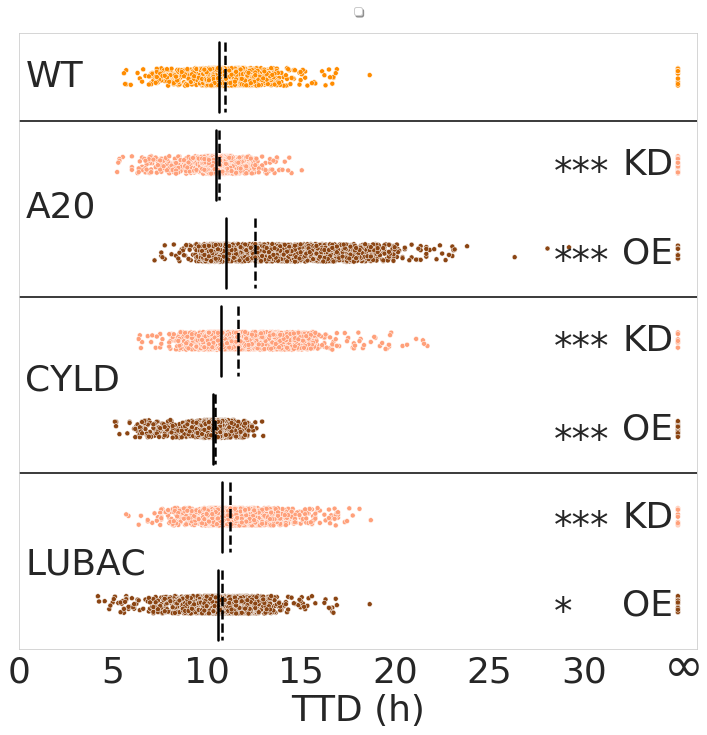

In [146]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (10,10))
my_pal = {"WT": "darkorange",
          "A20 KD":"lightsalmon", "A20 OE":"saddlebrown",
          "CYLD KD": "lightsalmon", "CYLD OE":"saddlebrown",
          "LUBAC KD": "lightsalmon", "LUBAC OE":"saddlebrown"}
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n2), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor="white")
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('CYLD', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('LUBAC', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
medianprops = dict(linestyle = '-', linewidth=2.5, color='k')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='black')
b = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops = meanlineprops,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfclus0n2),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 36)
plt.annotate('CYLD', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 36)
plt.annotate('LUBAC', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 36)

plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 36)#(-0.2,.7)
plt.annotate('KD', xy = (0.89,.77), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.625), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)
plt.annotate('KD', xy = (0.89,.483), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.34), xycoords ='axes fraction', fontsize =36) #(-0.2,.12)
plt.annotate('KD', xy = (0.89,.197), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.055), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)

plt.annotate('***', xy = (0.79,.755), xycoords ='axes fraction', fontsize = 37) #a20kd
plt.annotate('***', xy = (0.79,.61), xycoords ='axes fraction', fontsize = 37)#a20oe 
plt.annotate('***', xy = (0.79,.47), xycoords ='axes fraction', fontsize = 37) #cyldkd
plt.annotate('***', xy = (0.79,.32), xycoords ='axes fraction', fontsize = 37) #cyldoe
plt.annotate('***', xy = (0.79,.18), xycoords ='axes fraction', fontsize = 37) #lubkd
plt.annotate('*', xy = (0.79,.04), xycoords ='axes fraction', fontsize = 37) #luboe
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 48)

# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 36)
b.set_ylabel("")
b.tick_params(labelsize=36)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
b.set_xlabel("TTD (h)",fontsize = 36)
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_medwsig.pdf')

In [12]:
dfmode2hr = pd.read_csv("mode2_allparamsensdf_ttds.csv", index_col=0)

No handles with labels found to put in legend.


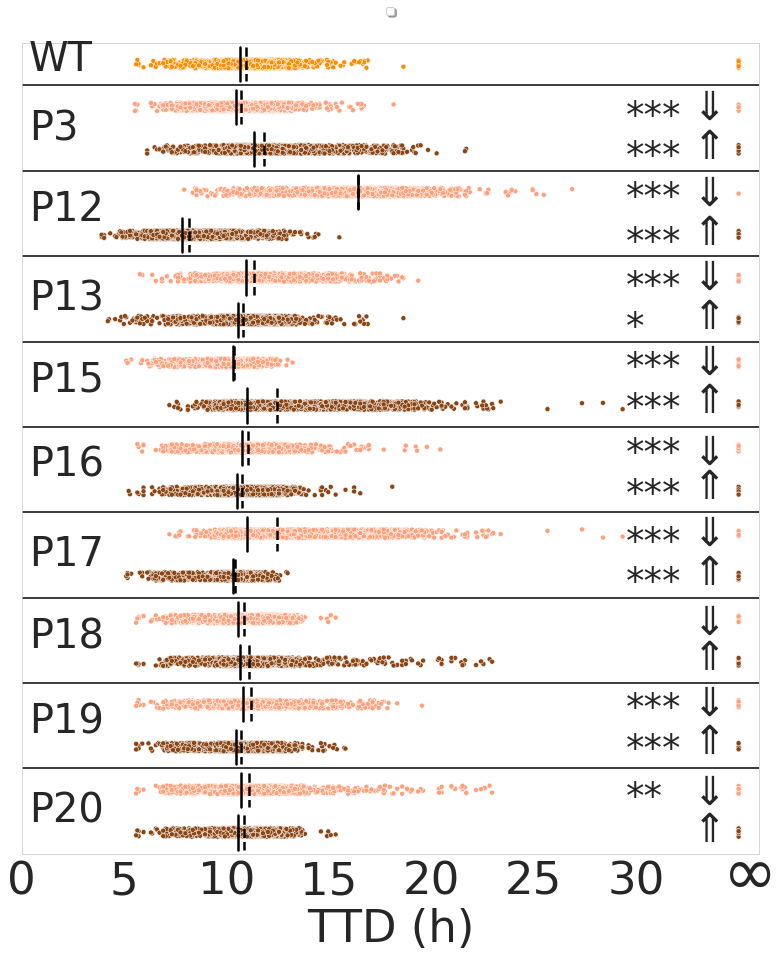

In [144]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (11,13))
my_pal = {"WT": "darkorange",
          'P3 KD': "lightsalmon",'P3 OE':"saddlebrown",
          'P12 KD': "lightsalmon",'P12 OE':"saddlebrown",
          'P13 KD': "lightsalmon",'P13 OE':"saddlebrown",
          'P15 KD': "lightsalmon",'P15 OE':"saddlebrown", 
          'P16 KD': "lightsalmon",'P16 OE':"saddlebrown",
          'P17 KD': "lightsalmon",'P17 OE':"saddlebrown",
          'P18 KD': "lightsalmon",'P18 OE':"saddlebrown",
          'P19 KD': "lightsalmon",'P19 OE':"saddlebrown",
          'P20 KD': "lightsalmon",'P20 OE':"saddlebrown"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode2hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)
medianprops = dict(linestyle = '-', linewidth=2.5, color='k')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='black')
b = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops = meanlineprops,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode2hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.annotate('WT', xy = (0.01,.965), xycoords ='axes fraction', fontsize = 40)#(-0.2,.7)
plt.annotate(r'$\Downarrow$', xy = (0.90,.905), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.857), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.799), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.751), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.695), xycoords ='axes fraction', fontsize =40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.647), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.59), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.543), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.48), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.437), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.38), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.331), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.27), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.227), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.17), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.123), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.06), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.015), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)

# plt.axhline(y=18.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (0.01,.88), xycoords ='axes fraction', fontsize = 40)#(-0.2,.7)
plt.annotate('P12', xy = (0.01,.78), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P13', xy = (0.01,.67), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P15', xy = (0.01,.57), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P16', xy = (0.01,.465), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P17', xy = (0.01,.355), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P18', xy = (0.01,.253), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P19', xy = (0.01,.148), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P20', xy = (0.01,.039), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)

plt.annotate('***', xy = (0.82,.895), xycoords ='axes fraction', fontsize = 37) #p3kd
plt.annotate('***', xy = (0.82,.845), xycoords ='axes fraction', fontsize = 37) #p3oe
plt.annotate('***', xy = (0.82,.795), xycoords ='axes fraction', fontsize = 37) #p12kd
plt.annotate('***', xy = (0.82,.739), xycoords ='axes fraction', fontsize = 37) #p12oe
plt.annotate('***', xy = (0.82,.685), xycoords ='axes fraction', fontsize = 37) #p13kd
plt.annotate('*', xy = (0.82,.635), xycoords ='axes fraction', fontsize = 37) #p13oe
plt.annotate('***', xy = (0.82,.585), xycoords ='axes fraction', fontsize = 37) #p15kd
plt.annotate('***', xy = (0.82,.535), xycoords ='axes fraction', fontsize = 37) #p15oe
plt.annotate('***', xy = (0.82,.479), xycoords ='axes fraction', fontsize = 37) #p16kd
plt.annotate('***', xy = (0.82,.429), xycoords ='axes fraction', fontsize = 37) #p16oe

plt.annotate('***', xy = (0.82,.37), xycoords ='axes fraction', fontsize = 37) #p17kd
plt.annotate('***', xy = (0.82,.32), xycoords ='axes fraction', fontsize = 37) #p17oe

# plt.annotate('*', xy = (0.82,0.265), xycoords ='axes fraction', fontsize = 37) #p18kd
# plt.annotate('**', xy = (0.82,.215), xycoords ='axes fraction', fontsize = 37) #p18oe
plt.annotate('***', xy = (0.82,0.165), xycoords ='axes fraction', fontsize = 37) #p19kd
plt.annotate('***', xy = (0.82,0.115), xycoords ='axes fraction', fontsize = 37) #p19oe
plt.annotate('**', xy = (0.82,0.055), xycoords ='axes fraction', fontsize = 37) #p20kd
# plt.annotate('**', xy = (0.82,0.005), xycoords ='axes fraction', fontsize = 37) #p20oe
plt.annotate(r'$\infty$', xy = (0.95,-0.048), xycoords ='axes fraction', fontsize = 65)
b.set_xlabel("TTD (h)",fontsize =45)
plt.xticks(fontsize = 45)
b.set_ylabel("")
b.tick_params(labelsize=45)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_medwsig.pdf')

In [117]:
from scipy.stats import ks_2samp
#KS TEST
print('P3KD','P3OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P3 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P3 OE']))
print('P12KD','P12OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P12 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P12 OE']))
print('P13KD','P13OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P13 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P13 OE']))
print('P15KD','P15OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P15 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P15 OE']))
print('P16KD','P16OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P16 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P16 OE']))
print('P17KD','P17OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P17 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P17 OE']))
print('P18KD','P18OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P18 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P18 OE']))
print('P19KD','P19OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P19 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P19 OE']))
print('P20KD','P20OE')
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P20 KD']))
print(ks_2samp(dfmode2hr['WT'], dfmode2hr['P20 OE']))

P3KD P3OE
Ks_2sampResult(statistic=0.10289481226712521, pvalue=1.4594160294629965e-16)
Ks_2sampResult(statistic=0.21983376325594728, pvalue=4.394528431319105e-74)
P12KD P12OE
Ks_2sampResult(statistic=0.9269131556319863, pvalue=0.0)
Ks_2sampResult(statistic=0.824018343364861, pvalue=0.0)
P13KD P13OE
Ks_2sampResult(statistic=0.11865864144453997, pvalue=6.9340637847799905e-22)
Ks_2sampResult(statistic=0.0472914875322442, pvalue=0.0007802960045619678)
P15KD P15OE
Ks_2sampResult(statistic=0.31613642877615367, pvalue=9.38897938736761e-153)
Ks_2sampResult(statistic=0.2866150759529952, pvalue=1.240684365159409e-125)
P16KD P16OE
Ks_2sampResult(statistic=0.0627687016337059, pvalue=1.9767847685683164e-06)
Ks_2sampResult(statistic=0.07366007451991974, pvalue=1.0745051498494086e-08)
P17KD P17OE
Ks_2sampResult(statistic=0.2877615362568071, pvalue=1.2302660569559e-126)
Ks_2sampResult(statistic=0.3138435081685297, pvalue=1.493704731179301e-150)
P18KD P18OE
Ks_2sampResult(statistic=0.02436228145600461,

In [59]:
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P3 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P3 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P12 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P12 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P13 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P13 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P15 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P15 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P16 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P16 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P17 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P17 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P18 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P18 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P19 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P19 OE']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P20 KD']))
print(ttest_ind(dfmode2hr['WT'], dfmode2hr['P20 OE']))

Ttest_indResult(statistic=5.168803615232511, pvalue=2.4214148860301506e-07)
Ttest_indResult(statistic=-18.019095972027163, pvalue=5.5113589879787734e-71)
Ttest_indResult(statistic=-124.75340997165418, pvalue=0.0)
Ttest_indResult(statistic=63.38355029058386, pvalue=0.0)
Ttest_indResult(statistic=-9.066309031614022, pvalue=1.5746565009194466e-19)
Ttest_indResult(statistic=3.157681920565504, pvalue=0.0015970700191603963)
Ttest_indResult(statistic=15.620882567145436, pvalue=4.29576287147804e-54)
Ttest_indResult(statistic=-25.78762792488854, pvalue=3.8085916935117623e-140)
Ttest_indResult(statistic=-2.5147037061584614, pvalue=0.011935554149073732)
Ttest_indResult(statistic=4.564683186865881, pvalue=5.0882277451449875e-06)
Ttest_indResult(statistic=-26.016570105808498, pvalue=1.6897931663711654e-142)
Ttest_indResult(statistic=11.779809606266745, pvalue=9.898307293334479e-32)
Ttest_indResult(statistic=1.9918601808706042, pvalue=0.04642532037618023)
Ttest_indResult(statistic=-2.951521569010446

In [118]:
#Median Test
from scipy.stats import median_test
print('P3KD','P3OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P3 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P3 OE']))
print('P12KD','P12OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P12 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P12 OE']))
print('P13KD','P13OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P13 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P13 OE']))
print('P15KD','P15OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P15 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P15 OE']))
print('P16KD','P16OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P16 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P16 OE']))
print('P17KD','P17OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P17 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P17 OE']))
print('P18KD','P18OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P18 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P18 OE']))
print('P19KD','P19OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P19 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P19 OE']))
print('P20KD','P20OE')
print(median_test(dfmode2hr['WT'], dfmode2hr['P20 KD']))
print(median_test(dfmode2hr['WT'], dfmode2hr['P20 OE']))

P3KD P3OE
(35.2565149296492, 2.8901365635611483e-09, 10.521042084168336, array([[1862, 1613],
       [1627, 1876]]))
(310.62763460384025, 1.594039788506483e-69, 10.881763527054106, array([[1343, 2080],
       [2146, 1409]]))
P12KD P12OE
(5958.351023110715, 0.0, 12.985971943887774, array([[ 125, 3350],
       [3364,  139]]))
(4377.563143430208, 0.0, 9.979959919839681, array([[3095,  331],
       [ 394, 3158]]))
P13KD P13OE
(96.98901181907047, 6.971314086238964e-23, 10.761523046092183, array([[1468, 1880],
       [2021, 1609]]))
(4.242187621370695, 0.03943132749953525, 10.5811623246493, array([[1745, 1658],
       [1744, 1831]]))
P15KD P15OE
(366.20174980865755, 1.2566151673217674e-81, 10.460921843687377, array([[2012, 1214],
       [1477, 2275]]))
(110.08829530946434, 9.372182747393448e-26, 10.761523046092183, array([[1468, 1907],
       [2021, 1582]]))
P16KD P16OE
(27.319832681483128, 1.724337036547905e-07, 10.701402805611224, array([[1542, 1761],
       [1947, 1728]]))
(30.72280787738

In [48]:
print(ttdm2wt2.count(35))
print(ttdm2a20kd2.count(35))
print(ttdm2a20oe2.count(35))
print(ttdm2cyldkd2.count(35))
print(ttdm2cyldoe2.count(35))
print(ttdm2lubkd2.count(35))
print(ttdm2luboe22.count(35))

12
23
8
8
18
12
10
